### Idea: generate a process to downsample mnist 0's from 28x28 to 14x14, then place the downsampled image in a random corner of a black image

In [4]:
%matplotlib inline

In [5]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import copy

my_cmap='gray'

#### Grab and plot a zero

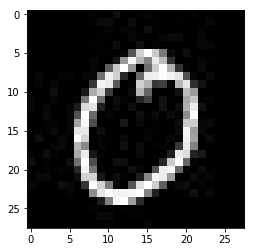

In [6]:
image_path='..\Downloads/mnistasjpg/trainingSet/trainingSet/0'
image_file=os.listdir(image_path)[200]

im=Image.open(os.path.join(image_path,image_file))
zero=np.asarray(im)
plt.imshow(zero,cmap=my_cmap);

#note: the semicolon after plotting suppresses matplotlib's axes output

#### Plot each quadrant of the original image separately to demonstrate slicing

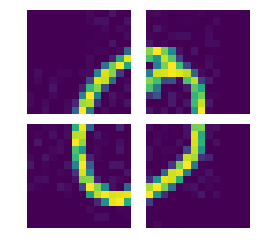

In [7]:
fig,ax=plt.subplots(2,2)
fig.subplots_adjust(hspace=0.1, wspace=-0.45)
ax[0,0].imshow(zero[0:14,0:14])
ax[0,1].imshow(zero[0:14,14:])
ax[1,0].imshow(zero[14:,0:14])
ax[1,1].imshow(zero[14:,14:])

[[ax[i,j].axis('off') for i in range(2)] for j in range(2)];



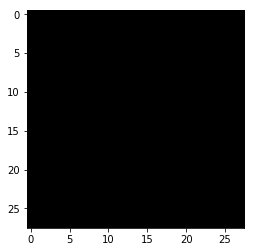

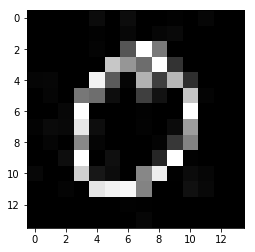

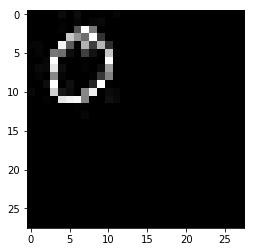

In [8]:
#Generate black image
black_image=np.reshape(np.zeros(28*28),(28,28))
plt.figure()
plt.imshow(black_image,cmap=my_cmap);

#downsize original zero
plt.figure()
im_small=im.resize((14,14))
zero_small=np.asarray(im_small)
plt.imshow(np.asarray(im_small),cmap=my_cmap);

#put small zero in corner
corner_zero=copy.deepcopy(black_image)
corner_zero[0:14,0:14]=zero_small
plt.figure()
plt.imshow(corner_zero,cmap=my_cmap);

#### Now let's make the 'cornerization'  random

0.3501561447083906


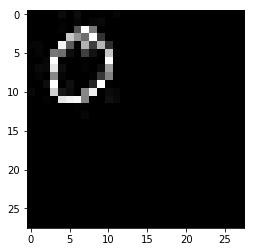

In [9]:
corner_zero=copy.deepcopy(black_image)
u=np.random.uniform(0,1)
if u<0.25:
    corner_zero[0:14, 14:] = zero_small

elif u<0.5:
    corner_zero[0:14, 0:14] = zero_small

elif u<0.75:
    corner_zero[14:, 0:14] = zero_small

else: 
    corner_zero[14:, 14:] = zero_small
    
plt.imshow(corner_zero,cmap=my_cmap)
print(u)

#### Now let's make it a function so we can randomly 'cornerize' any PIL image

In [10]:
def cornerize(image):
    np_image=np.asarray(image)

    side_length=np_image.shape[0]
    half_side=side_length//2
    
    small_image=image.resize((half_side, half_side))
    small_image=np.asarray(small_image)
    
    black_image=np.reshape(np.zeros(side_length*side_length),(side_length,side_length))
    
    u=np.random.uniform(0,1)
    
    if u<0.25:
        black_image[0:half_side, half_side:] = small_image

    elif u<0.5:
        black_image[0:half_side, 0:half_side] = small_image

    elif u<0.75:
        black_image[half_side:, 0:half_side] = small_image

    else: 
        black_image[half_side:, half_side:] = small_image
        
    return black_image
    

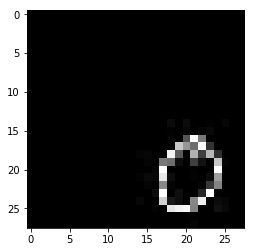

In [11]:
plt.imshow(cornerize(im), cmap=my_cmap);